# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [2]:
#import pandas
import pandas as pd
#Read csv file
data = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
#Show information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
#Explorer the data
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [4]:
#Check if there are duplicates in data
data.duplicated().sum()

0

In [5]:
#Check for  missing alues
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusion

1. 'model_year' should be integer
2. 'cylinders' should be integer
3. 'is_4wd' should be boolean
4. 'date_posted' should be dateTime
5. there are missing  values that should be fix in the following fields:
    - model_year - 3,619 missing values
    - cylinders - 5,260 missing values
    - odometer - 7,892 missing values
    - paint_color - 9,267 missing values
    - is_4wd - 25,953 missing values
6. There are no duplicates data

## Data preprocessing

##### Processing missing values

In [6]:
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [7]:
#Change NaN to True in 'is_4wd' field  for 'pickup' type   

data.loc[data['type'] == 'pickup','is_4wd']= data.loc[data['type'] == 'pickup','is_4wd'].fillna(1)
#data.loc[data['type'] == 'pickup','is_4wd'].fillna(1,inplace=True)

In [8]:
#Change NaN to True in 'is_4wd' field  for 'truck' type   

data.loc[data['type'] == 'truck','is_4wd']= data.loc[data['type'] == 'truck','is_4wd'].fillna(1)

In [9]:
#Change NaN to True in 'is_4wd' field  for 'offroad' type   

data.loc[data['type'] == 'offroad','is_4wd']= data.loc[data['type'] == 'offroad','is_4wd'].fillna(1)

In [10]:
#Change NaN to True in 'is_4wd' field  for 'bus' type   

data.loc[data['type'] == 'bus','is_4wd']= data.loc[data['type'] == 'bus','is_4wd'].fillna(1)

In [11]:
#Change NaN to False in 'is_4wd' field  for 'convertible' type   

data.loc[data['type'] == 'convertible','is_4wd']= data.loc[data['type'] == 'convertible','is_4wd'].fillna(0)

In [12]:
#Change NaN to False in 'is_4wd' field  for 'wagon' type   
# wagon is not 4X4 car
data.loc[data['type'] == 'wagon','is_4wd']= data.loc[data['type'] == 'wagon','is_4wd'].fillna(0)

In [13]:
#Change NaN to False in 'is_4wd' field  for 'sedan' type   
# sedan is not 4X4 car
data.loc[data['type'] == 'sedan','is_4wd']= data.loc[data['type'] == 'sedan','is_4wd'].fillna(0)

In [14]:
#Change NaN to False in 'is_4wd' field  for 'hatchback' type   
# sedan is not 4X4 car
data.loc[data['type'] == 'hatchback','is_4wd']= data.loc[data['type'] == 'hatchback','is_4wd'].fillna(0)

In [15]:
#Change NaN to False in 'is_4wd' field  for 'van' type   
# van is not 4X4 car
data.loc[data['type'] == 'van','is_4wd']= data.loc[data['type'] == 'van','is_4wd'].fillna(0)

In [16]:
#Change NaN to False in 'is_4wd' field  for 'mini-van' type   
# mini-van is not 4X4 car
data.loc[data['type'] == 'mini-van','is_4wd']= data.loc[data['type'] == 'mini-van','is_4wd'].fillna(0)

In [17]:
#Change NaN to False in 'is_4wd' field  for 'coupe' type   
# coupe is not 4X4 car
data.loc[data['type'] == 'coupe','is_4wd']= data.loc[data['type'] == 'coupe','is_4wd'].fillna(0)

In [18]:
#Check how many SUV cars are 4wd
#SUV can be 2wd or 4wd
#conclusion - all SUV cars are 4wd so we can change for them NaN to True
data[data['type'] == 'SUV']['is_4wd'].value_counts()

1.0    8853
Name: is_4wd, dtype: int64

In [19]:
#Change NaN to False in 'is_4wd' field  for 'SUV' type   
# SUV is not 4X4 car
data.loc[data['type'] == 'SUV','is_4wd']= data.loc[data['type'] == 'SUV','is_4wd'].fillna(0)


In [20]:
#Check how many 'other' cars are 4wd
#conclusion - all 'other' cars are 4wd so we can change for them NaN to True
data[data['type'] == 'other']['is_4wd'].value_counts()

1.0    126
Name: is_4wd, dtype: int64

In [21]:
#Change NaN to False in 'is_4wd' field  for 'other' type   
# coupe is not 4X4 car
data.loc[data['type'] == 'other','is_4wd']= data.loc[data['type'] == 'other','is_4wd'].fillna(0)

In [22]:
#Check the most popular 'cylinders' for each car 'type' and change null values according to it
data1 = data.pivot_table( index='type', columns='cylinders' , values='is_4wd', aggfunc=['count'])
data1

count                                           
cylinders    3.0     4.0    5.0     6.0     8.0    10.0 12.0
type                                                        
SUV           5.0  3020.0    9.0  5710.0  2373.0   64.0  NaN
bus           NaN     NaN    NaN     2.0     5.0   13.0  NaN
convertible   NaN    27.0    1.0   161.0   217.0    4.0  NaN
coupe         NaN   444.0    1.0   778.0   802.0   56.0  NaN
hatchback     2.0   870.0    NaN    21.0    19.0    5.0  NaN
mini-van      1.0    18.0    NaN  1013.0     2.0    NaN  NaN
offroad       NaN    18.0    NaN   139.0    35.0    NaN  NaN
other         NaN    75.0    NaN   110.0    40.0    NaN  NaN
pickup        3.0   257.0   41.0  1998.0  3943.0   32.0  NaN
sedan        20.0  8007.0  168.0  2410.0   232.0   61.0  NaN
truck         2.0   270.0   48.0  2465.0  8003.0  298.0  2.0
van           NaN     9.0    NaN   451.0    92.0   16.0  NaN
wagon         1.0   849.0    4.0   442.0    81.0    NaN  NaN

In [23]:
#Change NaN to 6.0 in 'cylinders' field  for 'SUV' type   
#Most SUV cars are 6.0 cylinders
data.loc[data['type'] == 'SUV','cylinders']= data.loc[data['type'] == 'SUV','cylinders'].fillna(6.0)

In [24]:
#Change NaN to 8.0 in 'cylinders' field  for 'truck' type   
#Most truck cars are 8.0 cylinders
data.loc[data['type'] == 'truck','cylinders']= data.loc[data['type'] == 'truck','cylinders'].fillna(8.0)

In [25]:
#Change NaN to 4.0 in 'cylinders' field  for 'sedan' type   
#Most sedan cars are 4.0 cylinders
data.loc[data['type'] == 'sedan','cylinders']= data.loc[data['type'] == 'sedan','cylinders'].fillna(4.0)

In [26]:
#Change NaN to 8.0 in 'cylinders' field  for 'pickup' type   
#Most pickup cars are 8.0 cylinders
data.loc[data['type'] == 'pickup','cylinders']= data.loc[data['type'] == 'pickup','cylinders'].fillna(8.0)

In [27]:
#Change NaN to 6.0 in 'cylinders' field  for 'mini-van' type   
#Most mini-van cars are 6.0 cylinders
data.loc[data['type'] == 'mini-van','cylinders']= data.loc[data['type'] == 'mini-van','cylinders'].fillna(6.0)

In [28]:
#Change NaN to 4.0 in 'cylinders' field  for 'hatchback' type   
#Most hatchback cars are 4.0 cylinders
data.loc[data['type'] == 'hatchback','cylinders']= data.loc[data['type'] == 'hatchback','cylinders'].fillna(40)

In [29]:
#Change NaN to 6.0 in 'cylinders' field  for 'offroad' type   
#Most offroad cars are 6.0 cylinders
data.loc[data['type'] == 'offroad','cylinders']= data.loc[data['type'] == 'offroad','cylinders'].fillna(6.0)

In [30]:
#Change NaN to 4.0 in 'cylinders' field  for 'wagon' type   
#Most wagon cars are 4.0 cylinders
data.loc[data['type'] == 'wagon','cylinders']= data.loc[data['type'] == 'wagon','cylinders'].fillna(4.0)

In [31]:
#Change NaN to 6.0 in 'cylinders' field  for 'van' type   
#Most van cars are 6.0 cylinders
data.loc[data['type'] == 'van','cylinders']= data.loc[data['type'] == 'van','cylinders'].fillna(6.0)

In [32]:
#Change NaN to False in '4.0' field  for 'hatchback' type   
#Most hatchback cars are 4.0 cylinders
data.loc[data['type'] == 'hatchback','cylinders']= data.loc[data['type'] == 'hatchback','cylinders'].fillna(4.0)

In [33]:
#Change NaN to 10.0 in 'cylinders' field  for 'bus' type   
#Most bus cars are 10.0 cylinders
data.loc[data['type'] == 'bus','cylinders']= data.loc[data['type'] == 'bus','cylinders'].fillna(10.0)

In [34]:
#Change NaN to 8.0 in 'cylinders' field  for 'convertible' type   
#Most convertible cars are 8.0 cylinders
data.loc[data['type'] == 'convertible','cylinders']= data.loc[data['type'] == 'convertible','cylinders'].fillna(8.0)

In [35]:
#Change NaN to 6.0 in 'cylinders' field  for 'other' type   
#Most other cars are 6.0 cylinders
data.loc[data['type'] == 'other','cylinders']= data.loc[data['type'] == 'other','cylinders'].fillna(6.0)

In [36]:
#For 'coupe' car  8.0 and 6.0 have almost the same numbers
#6.0 with 778 cars and 8.0 with 802 cars
#For type 'coupe' there are 222 missing values
#in order not to change the ratio i'll change NaN values according to nodel and take the median value 
data['cylinders'] = data.cylinders.fillna(data[data['type'] == 'coupe'].groupby('model')['cylinders'].transform('median'))
#There are still 2 missing values 
data[data['cylinders'].isnull()]
#fill those values with 6.0 that is the most popular
data['cylinders'] = data.cylinders.fillna(6.0)

In [37]:
data.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [38]:
#Check the most popular 'model_year' for each car 'model' and change null values according to it
#data1 = data.pivot_table( index='model', columns='model_year' , values='is_4wd', aggfunc=['mean'])
#data1
data['model_year'] = data.model_year.fillna(data.groupby('model')['model_year'].transform('median'))

In [39]:
#Fill missing values in 'odometer' column according to model and model_year
data['odometer'] = data.odometer.fillna(data.groupby(['model','model_year'])['odometer'].transform('median'))
#There are stil 625 missing values that dont have mean value by ['model','model_year']
#This missing values will fill by 'model_year'
data['odometer'] = data.odometer.fillna(data.groupby('model_year')['odometer'].transform('median'))
data[data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


In [40]:
#Fill missing values in 'paint_color' with 'other' value
data['paint_color'] = data.paint_color.fillna('other')

###### Data type replacement


In [41]:
#Replace 'model_year' type
#model year is a integer value
data['model_year'] = data['model_year'].astype(int)

In [42]:
#Replace 'cylinders' type
#cylinders is an integer value 
data['cylinders'] = data['cylinders'].astype(int)

In [43]:
#Replace 'is_4wd' type
#1/0 value so it should be boolean
data['is_4wd'] = data['is_4wd'].astype(bool)

In [44]:
#Replace 'date_posted' type
#date column should be datetime
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')

In [45]:
#Check data to varify data type replacement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51524 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Make calculations and add them to the table

In [46]:
#add column 'year_date_posted' that represent the year that the ad was published
data['year_date_posted'] = data['date_posted'].dt.year

In [47]:
#add column 'month_date_posted' that represent the month that the ad was published
data['month_date_posted'] = data['date_posted'].dt.month

In [48]:
#add column 'day_date_posted' that represent the day that the ad was published
data['day_date_posted'] = data['date_posted'].dt.day

In [49]:
#Calculate vehicle age
data['age'] = data['year_date_posted'] - data['model_year'] +1

In [50]:
#Calculate average mileage per year
data['avg_mileage_year'] = data['odometer'] / data['age']

In [51]:
#replace string values with a numeric scale:
data.condition.replace(to_replace={'new':5,'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0},inplace=True)

## Carry out exploratory data analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8135d33150>]],
      dtype=object)

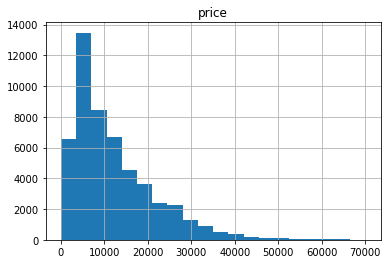

In [52]:
#Histogram on 'price'
data.hist('price', range=(0,70000),bins=20)

'price' Histogram - we can see that the range of most prices are between 0 - 42000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812d3239d0>]],
      dtype=object)

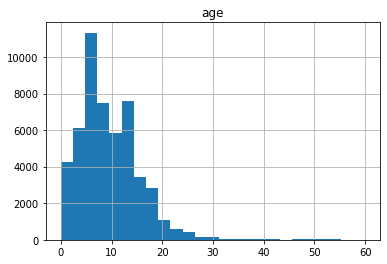

In [53]:
#Histogram on 'age'
data.hist('age',range=(0,60),bins=25)

'age' histogram - we can see that the range of most ages  are between 1 - 26

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812d2de990>]],
      dtype=object)

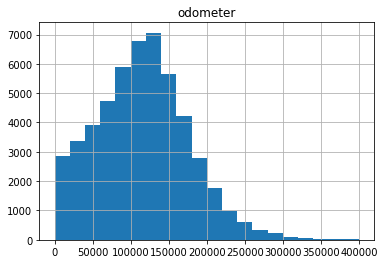

In [54]:
#Histogram on 'odometer'
data.hist('odometer', range=(0,400000),bins=20)

'odometer' histogram - we can see that the range of most odometer  is between 0 - 270000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812d1f00d0>]],
      dtype=object)

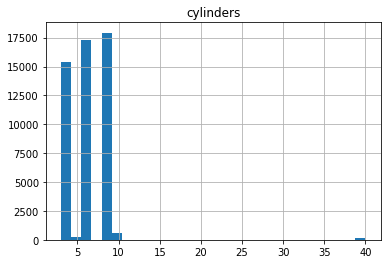

In [55]:
#Histogram on 'cylinders'
data.hist('cylinders', bins=30)

'cylinders' histogram - we can see that the range of most cylinders  are 4,6,8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812d1a48d0>]],
      dtype=object)

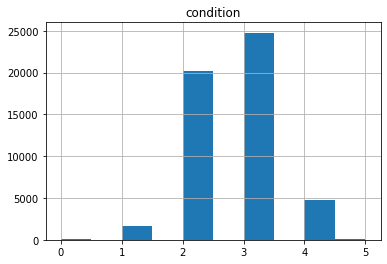

In [56]:
#Histogram on 'condition'
data.hist('condition')

'condition' histogram - we can see that the most common condition  are  2(good) and 3(excellent) but also 1 and 4 have amount of cars so we'll remove only 0 and 5 

##### Remove outliers

In [56]:
#Remove outliers for 'price'
num_of_car = data.query('price >35000')['type'].count()
#num_of_car == 1414 -> number of cars with price>35000
data_filtered = data.query('price <=35000')

Removing outliers from price.
number of cars with price>35000 is 1414that is  2.8% of total numbers of cars

In [57]:
#Remove outliers for 'age'
data_filtered = data_filtered.query('age> 1 and age <=26')

range of most ages  are between 1 - 26

In [58]:
#Remove outliers for 'odometer'
data_filtered = data_filtered.query('odometer <=270000')

range of most odometer  is between 0 - 270000

In [59]:
#Remove outliers for 'cylinders'
data_filtered = data_filtered.query('cylinders ==4 or (cylinders >=6 and  cylinders <=8)')

 range of most cylinders are 4,6,8

In [60]:
#Remove outliers for 'condition'
data_filtered = data_filtered.query('condition>=1 and condition <=4')

most common condition  are  2(good) and 3(excellent)  but also 1 and 4 have amount of cars so we'll remove only 0 and 5 

##### Histograms on filtered data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d261bbd0>]],
      dtype=object)

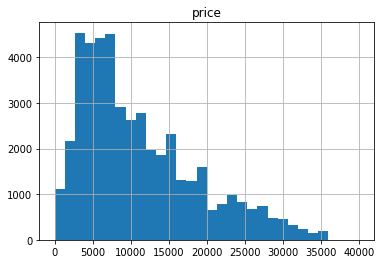

In [61]:
#Histogram on 'price'
data_filtered.hist('price',bins=30, range=(0,40000))

After removing outliers, we can see more clearly the distribution of price.
most cars price are from 4000 to 8000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d264e9d0>]],
      dtype=object)

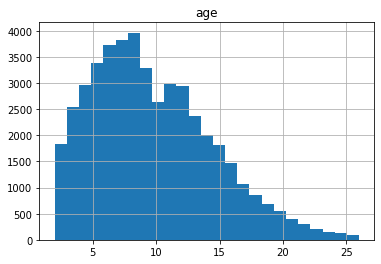

In [62]:
#Histogram on 'age'
data_filtered.hist('age',bins=25)

After removing outliers, we can see more clearly the distribution of age. most cars age are from 7 to 16

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d2504d90>]],
      dtype=object)

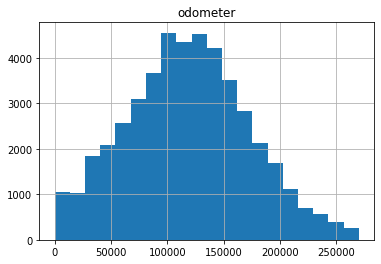

In [63]:
#Histogram on 'odometer'
data_filtered.hist('odometer',bins=20)

After removing outliers, we can see more clearly the distribution of odometer. most cars odometer are from 80,000 to 160,000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d2449e50>]],
      dtype=object)

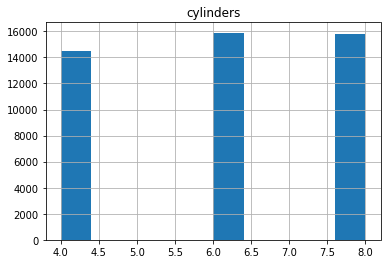

In [64]:
#Histogram on 'cylinders'
data_filtered.hist('cylinders')

After removing outliers, we can see more clearly the distribution of cylinders. most cars cylinders are 4,6,8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d23d4750>]],
      dtype=object)

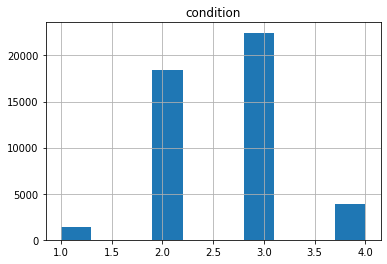

In [65]:
#Histogram on 'condition'
data_filtered.hist('condition')

After removing outliers, the distribution of condition remained the same. most cars condition are 2(good) and 3(excellent)

##### Investigate 'days_listed' column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d22ee0d0>]],
      dtype=object)

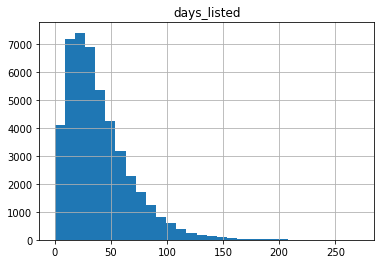

In [66]:
data_filtered.hist('days_listed',bins=30)

In [67]:
#Calculate mean value
days_listed_mean = data_filtered['days_listed'].mean()
days_listed_mean

39.54868597653375

In [68]:
#Calculate median value
days_listed_median = data_filtered['days_listed'].median()
days_listed_median

33.0

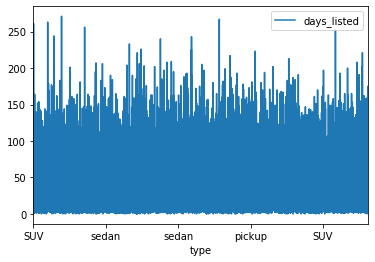

In [69]:
data_filtered.plot(x='type', y='days_listed')

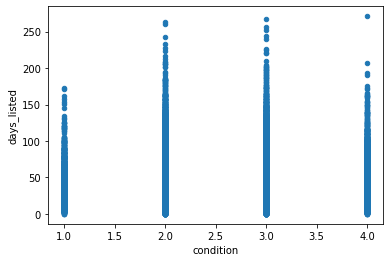

In [70]:
data_filtered.plot(x='condition', y='days_listed',kind='scatter')

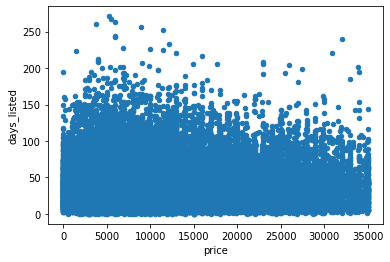

In [71]:
data_filtered.plot(x='price', y='days_listed',kind='scatter')

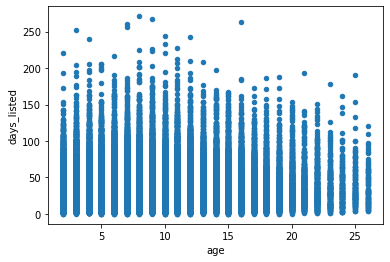

In [72]:
data_filtered.plot(x='age', y='days_listed',kind='scatter')

In [73]:
data_filtered.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
count,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000,46194.000000
mean,11164.025869,2009.752847,2.625514,6.054769,118111.120189,39.548686,2018.310885,6.607633,15.449972,9.558038,14164.506384
std,7740.823957,4.941007,0.679572,1.618747,54492.185227,28.208730,0.462861,3.479514,8.740285,4.947745,7139.468189
min,1.000000,1993.000000,1.000000,4.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,2.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,80125.000000,19.000000,2018.000000,3.000000,8.000000,6.000000,9859.050000
50%,8995.000000,2011.000000,3.000000,6.000000,118095.000000,33.000000,2018.000000,7.000000,15.000000,9.000000,13113.848214
75%,15500.000000,2014.000000,3.000000,8.000000,154000.000000,53.000000,2019.000000,10.000000,23.000000,13.000000,17216.666667
max,35000.000000,2018.000000,4.000000,8.000000,270000.000000,271.000000,2019.000000,12.000000,31.000000,26.000000,82204.500000


##### Conclusion about 'days_listed'

1. mean value for ad a car is 39.6 days
2. In order to sale a car fast , the car should have the following parameters:
    - price of 5250
    - model year  2007
    - odometer of 72285 
    - age of 7 years
    - average mileage per year of 7875
3. increase of the parameters above will increase the  days advertisementing an add 
4. days_listed_mean = 39.6
   days_listed_median = 33
   days_listed_mean > days_listed_median -> Thats mean that there are outliers of ad's that were posted for very long time
5. Car's listed for an abnormally long time  when price is high, the car is newer while the odometer and the average mileage      per year are higher. 

##### Analyze the number of ads and the average price for each type of vehicle

In [74]:
#Calculate number of ads for each type of vehicle
#data_filtered_avgPrice_sumOfAds1['sum_ads'] = data_filtered.groupby('type')['days_listed'].count()
#data_filtered_avgPrice_sumOfAds1 = data_filtered.groupby('type')['days_listed'].count()
#Calculate average price for each type of vehicle
#data_filtered_avgPrice_sumOfAds1['avg_price'] = data_filtered.groupby('type')['price'].mean()
#data_filtered_avgPrice_sumOfAds1

In [75]:
#Calculate number of ads for each type of vehicle
data_filtered_avgPrice_sumOfAds = data_filtered.pivot_table(index='type', values='price', aggfunc='mean')
data_filtered_avgPrice_sumOfAds['num_of_ads'] = data_filtered.pivot_table(index='type', values='days_listed', aggfunc='count')
data_filtered_avgPrice_sumOfAds.rename(columns={'price':'avg_price'},inplace=True)
data_filtered_avgPrice_sumOfAds.sort_values('num_of_ads', ascending=False)

,avg_price,num_of_ads
type,,
SUV,10397.399185,11536
sedan,6830.184745,11367
truck,15265.360623,10651
pickup,14629.958803,5947
coupe,13463.433438,1908
wagon,8979.429825,1482
mini-van,7736.816547,1112
hatchback,6636.909624,852
van,10156.825043,583


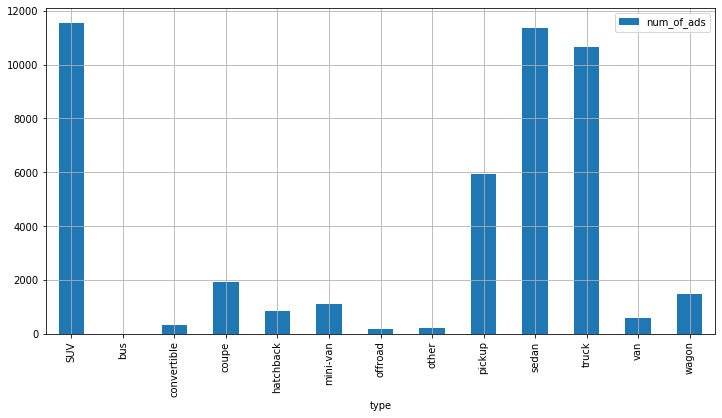

In [76]:
# graph showing the dependence of the number of ads on the vehicle type
data_filtered_avgPrice_sumOfAds.plot( y='num_of_ads', style='o',kind='bar', grid=True, figsize=(12,6))


###### conclusion

'SUV' and 'sedan' have the greatest number of ads

##### What factors impact the price most

In [77]:
#Get data for SUV
SUV_data_filtered = data_filtered.query("type=='SUV'")

In [78]:
#Check dependecny of price to paint_color
SUV_data_filtered.groupby('paint_color').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
paint_color,,,,,,,,,,,,,,,,,
purple,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
yellow,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
orange,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
custom,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
brown,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353
green,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415
red,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859
blue,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
grey,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115


we can see that colors 'yellow' and 'purple' as less than 50 ads.  those colors are not valid for analysis.
so we'll remove them

In [79]:
#Remove colors yellow and purple
SUV_data_filtered = SUV_data_filtered.query("paint_color not in ('yellow', 'purple')")
#Check the data to varify that the colors removed
SUV_data_filtered.groupby('paint_color').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
paint_color,,,,,,,,,,,,,,,,,
orange,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
custom,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280
brown,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353
green,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415
red,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859,859
blue,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
grey,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
silver,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477
white,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813


In [80]:
#Check dependecny of price to paint_color
SUV_data_filtered.groupby('transmission').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
transmission,,,,,,,,,,,,,,,,,
other,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
manual,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
automatic,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900,10900


transmission does'nt have less then 50 ad's

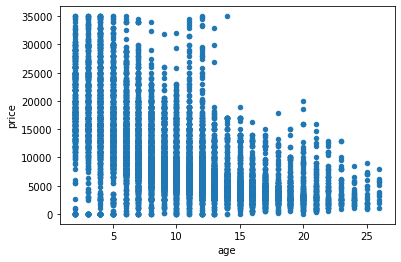

In [81]:
#Check dependecny of price to age
SUV_data_filtered.plot(x='age', y='price', kind='scatter')

As we can see from the graph, age impact the price.
as much the car is newer, the price is higher

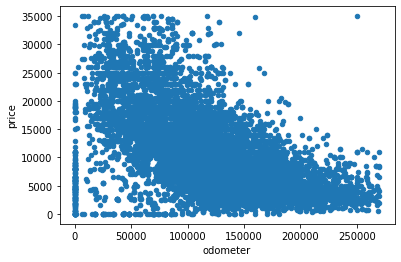

In [82]:
#Check dependecny of price to odometer
SUV_data_filtered.plot(x='odometer', y='price', kind='scatter')

As we can see from the graph, odometer impact the price.
as much the odometer is lower, the price is higher

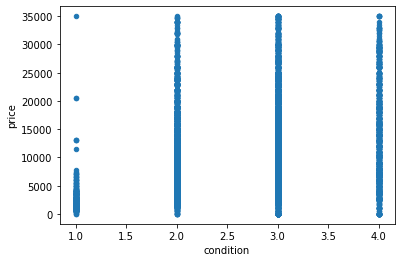

In [83]:
#Check dependecny of price to condition
SUV_data_filtered.plot(x='condition', y='price', kind='scatter')

As we can see from the graph, condition dos'nt impact the price.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


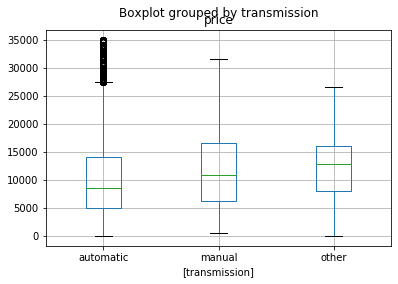

In [84]:
import matplotlib.pyplot as plt 
#Check dependecny of price to transmission
SUV_data_filtered[['transmission','price']].boxplot(by='transmission')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


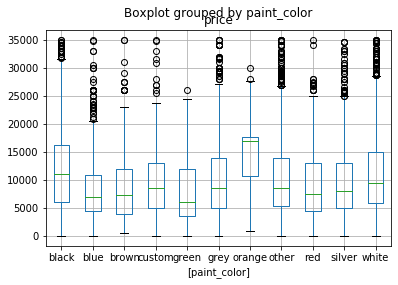

In [85]:
#Check dependecny of price to paint_color

SUV_data_filtered[['paint_color','price']].boxplot(by='paint_color')

In [86]:
#import seaborn as sns
#SUV_data_filtered.boxplot('transmission','price')

In [87]:
#Get data for sedan
sedan_data_filtered = data_filtered.query("type=='sedan'")

In [88]:
#check number of ads for each color to see if there are colores with less then 50 ads
sedan_data_filtered.groupby('paint_color').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
paint_color,,,,,,,,,,,,,,,,,
orange,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
yellow,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
purple,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
green,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
brown,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
custom,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
red,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
blue,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156
white,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383


The colors yellow, purple, orange  have less then 50 ads,so we'll remove them

In [89]:
#Remove colors yellow, purple, orange - they have less then 50 ads
sedan_data_filtered = sedan_data_filtered.query("paint_color not in ('yellow', 'purple','orange')")
#Check the data to varify that the colors removed
sedan_data_filtered.groupby('paint_color').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
paint_color,,,,,,,,,,,,,,,,,
green,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
brown,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
custom,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262,262
red,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888
blue,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156
white,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
grey,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515
black,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664
silver,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938,1938


In [90]:
#check number of ads for each color to see if there are colores with less then 50 ads
sedan_data_filtered.groupby('transmission').count().sort_values('model')

,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
transmission,,,,,,,,,,,,,,,,,
other,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
manual,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539
automatic,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707,10707


transmission dose'nt have ad's less then 50

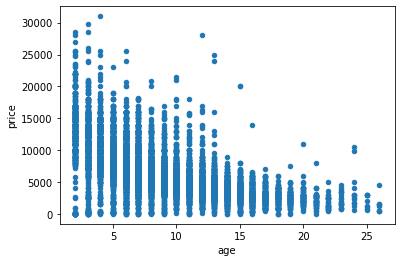

In [91]:
#Check dependecny of price to age
sedan_data_filtered.plot(x='age', y='price', kind='scatter')

As we can see from the graph,for sedan cars, age impact the price.
as much the car is newer, the price is higher

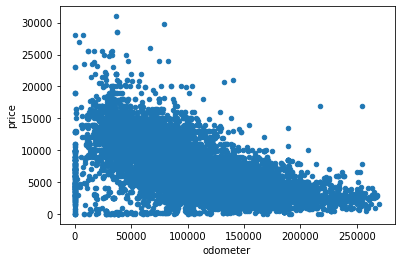

In [92]:
#Check dependecny of price to odometer
sedan_data_filtered.plot(x='odometer', y='price', kind='scatter')

As we can see from the graph,for sedan cars odometer impact the price.
as much the odometer is lower, the price is higher

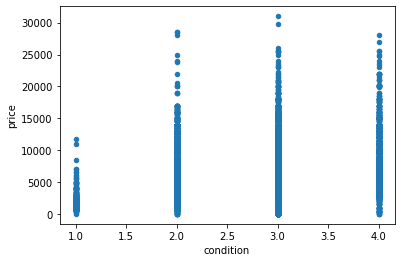

In [93]:
#Check dependecny of price to condition
sedan_data_filtered.plot(x='condition', y='price', kind='scatter')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


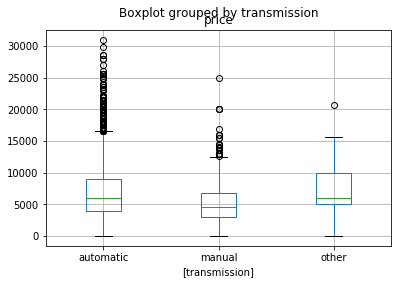

In [94]:
#Check dependecny of price to transmission
sedan_data_filtered[['transmission','price']].boxplot(by='transmission')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


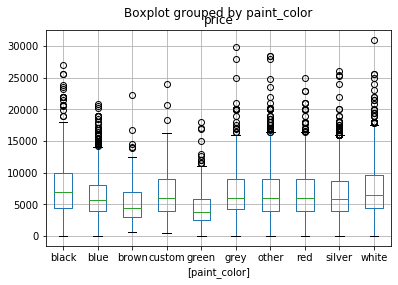

In [95]:
#Check dependecny of price to paint_color
sedan_data_filtered[['paint_color','price']].boxplot(by='paint_color')

##### Conclusion

As we can see from the graph, price and odometer impact the price.
as much the price and odometer is lower, the price is higher
condition,transmission and color dos'nt impact the price.
Checking the most popular types (sedan,SUV) gave us the same results

In [96]:
#correlation 
data_filtered.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_date_posted,month_date_posted,day_date_posted,age,avg_mileage_year
price,1.000000,0.524356,0.198295,0.357964,-0.440767,0.340348,-0.002989,0.017383,-0.016406,-0.002241,-0.522016,0.167183
model_year,0.524356,1.000000,0.263778,-0.166476,-0.553399,-0.093804,-0.001315,0.032272,-0.030070,0.001048,-0.995619,0.477456
condition,0.198295,0.263778,1.000000,-0.079987,-0.262702,-0.037606,0.000336,0.010116,-0.009591,-0.011102,-0.262473,0.035448
cylinders,0.357964,-0.166476,-0.079987,1.000000,0.144358,0.547097,0.003134,-0.003309,0.002409,-0.005922,0.165940,-0.020555
odometer,-0.440767,-0.553399,-0.262702,0.144358,1.000000,0.125975,0.004739,-0.027640,0.028400,-0.001501,0.550060,0.287651
is_4wd,0.340348,-0.093804,-0.037606,0.547097,0.125975,1.000000,0.001768,-0.003369,0.003859,-0.004593,0.093361,0.036531
days_listed,-0.002989,-0.001315,0.000336,0.003134,0.004739,0.001768,1.000000,0.009650,-0.010454,-0.000161,0.002216,0.000380
year_date_posted,0.017383,0.032272,0.010116,-0.003309,-0.027640,-0.003369,0.009650,1.000000,-0.819316,-0.062764,0.061321,-0.130527
month_date_posted,-0.016406,-0.030070,-0.009591,0.002409,0.028400,0.003859,-0.010454,-0.819316,1.000000,0.033117,-0.046618,0.110162
day_date_posted,-0.002241,0.001048,-0.011102,-0.005922,-0.001501,-0.004593,-0.000161,-0.062764,0.033117,1.000000,-0.006918,0.010929


##### Conclution

1.There is a negative correlation between price and age. as age increase, price decrease
2.There is a negative correlation between price and odometer. as odometer increase, price decrease
3.The condition of the car does'nt affect the price

## Overall conclusion

1. We have data about vehicales advertisments. the data was collected over the last few years.
2. We want to determine which factors influence the price of a vehicle. 
3. Before removing outliers , most cars price are in ranfe of 0 to 13000
   After removing outliers, we can see more clearly the distribution of price. most cars price range are  4000 to 8000
4. Before removing outliers , most cars age are in range 2 to 20
   After removing outliers, we can see more clearly the distribution of age. most cars age are from 7 to 16
5. Before removing outliers , most cars aodometerge are in range 0 to 200,000
   After removing outliers, we can see more clearly the distribution of odometer. most cars odometer are from 80,000 to 160,000
6. Most cars has number of cylinders of 4,6,8
7. Most cars condition are 2(good) and 3(excellent)
8. days_listed
   mean value for ad a car is 39.6 days
   In order to sale a car fast , the car should have the following parameters:
    -price of 5250
    -model year 2007
    -odometer of 72285
    -age of 7 years
    -average mileage per year of 7875
    -increase of the parameters above will increase the days advertisementing an add
    -days_listed_mean = 39.6 days_listed_median = 33 days_listed_mean > days_listed_median -> Thats mean that there are              outliers of ad's that were posted for very long time
     Car's listed for an abnormally long time when price is high, the car is newer while the odometer and the average mileage        per year are higher.
9.  SUV and sedan are the types with the greatest number of ads    
10. age influece the price of a car. The younger the vehicle, the price is higher
11. odometer influence the price of a car. The bigger it is, the price is lower
12. There is a negative correlation between price and age. as age increase, price decrease 2.There is a negative correlation       between price and odometer. as odometer increase, price decrease 3.The condition of the car does'nt affect the price